In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import librosa
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from random import shuffle
import scipy.stats as st

from pynwb import NWBHDF5IO
from pynwb.image import ImageSeries
from pynwb.epoch import TimeIntervals

In [7]:
nwbpath = 'M:\\scn2a-paper-GWJSNH\\NWB-files'
usefield = 'annotated_behavior'

assay = 'timedMating'
allnwb = []
allnwb += [os.path.join(nwbpath,each) for each in os.listdir(nwbpath) if assay in each]

In [8]:
allnwb

['M:\\scn2a-paper-GWJSNH\\NWB-files\\Nov22_Pair15_timedMating.nwb',
 'M:\\scn2a-paper-GWJSNH\\NWB-files\\Nov22_Pair16_timedMating.nwb',
 'M:\\scn2a-paper-GWJSNH\\NWB-files\\Nov22_Pair17_timedMating.nwb',
 'M:\\scn2a-paper-GWJSNH\\NWB-files\\Nov22_Pair18_timedMating.nwb',
 'M:\\scn2a-paper-GWJSNH\\NWB-files\\Nov22_Pair19_timedMating.nwb',
 'M:\\scn2a-paper-GWJSNH\\NWB-files\\Nov22_Pair1_timedMating.nwb',
 'M:\\scn2a-paper-GWJSNH\\NWB-files\\Nov22_Pair21_timedMating.nwb',
 'M:\\scn2a-paper-GWJSNH\\NWB-files\\Nov22_Pair22_timedMating.nwb',
 'M:\\scn2a-paper-GWJSNH\\NWB-files\\Nov22_Pair23_timedMating.nwb',
 'M:\\scn2a-paper-GWJSNH\\NWB-files\\Nov22_Pair24_timedMating.nwb',
 'M:\\scn2a-paper-GWJSNH\\NWB-files\\Nov22_Pair25_timedMating.nwb',
 'M:\\scn2a-paper-GWJSNH\\NWB-files\\Nov22_Pair26_timedMating.nwb',
 'M:\\scn2a-paper-GWJSNH\\NWB-files\\Nov22_Pair27_timedMating.nwb',
 'M:\\scn2a-paper-GWJSNH\\NWB-files\\Nov22_Pair28_timedMating.nwb',
 'M:\\scn2a-paper-GWJSNH\\NWB-files\\Nov22_Pair29

In [58]:
# ---- Look at latency to mount in timed matings ----

# keep track of details in arrays
allGT = []
allSex = []
times = []
colors = []
nroccurrences = []
behav='Mount'

# loop over nwb files matching specified assay name
for i,fname in enumerate(allnwb):
    # open file
    io = NWBHDF5IO(os.path.join(nwbpath,fname), mode="r") # <-- open in write to append snippets?
    nwbfile = io.read()
    
    # for sanity check, print out the name of the file being handled
    pathsplit = fname.split('\\')
    recstem = pathsplit[-1].strip('.nwb')
    print(recstem)
    
    # filter out files that don't have complete timelines
    
    # keep track of metadata
    allSex.append(nwbfile.subject.sex)
    allGT.append(nwbfile.subject.genotype)
    colors.append(nwbfile.lab_meta_data['vole_metadata'].colors[:])
       
    # -- Get time of first mount --
    
    # load up the BORIS table from the NWB file
    statsdf = nwbfile.intervals[usefield].to_dataframe()
    
    # find start time of assay
    assayStart = float(statsdf.start_time[statsdf.behavior=='Start assay'])
    # find time of first scored mount
    firstMount = np.min(statsdf.start_time[statsdf.behavior==behav])
    # subtract start time to get assay-aligned time
    firstMountAligned = firstMount-assayStart
    # append to times array
    times.append(firstMountAligned)
    # count total number of mounts
    isbehav = statsdf.behavior==behav
    nroccurrences.append(isbehav.values.sum())

Nov22_Pair15_timedMating
Nov22_Pair16_timedMating
Nov22_Pair17_timedMating
Nov22_Pair18_timedMating
Nov22_Pair19_timedMating
Nov22_Pair1_timedMating
Nov22_Pair21_timedMating
Nov22_Pair22_timedMating
Nov22_Pair23_timedMating
Nov22_Pair24_timedMating
Nov22_Pair25_timedMating
Nov22_Pair26_timedMating
Nov22_Pair27_timedMating
Nov22_Pair28_timedMating
Nov22_Pair29_timedMating
Nov22_Pair2_timedMating
Nov22_Pair30_timedMating
Nov22_Pair31_timedMating
Nov22_Pair32_timedMating
Nov22_Pair33_timedMating
Nov22_Pair34_timedMating
Nov22_Pair37_timedMating
Nov22_Pair38_timedMating
Nov22_Pair39_timedMating
Nov22_Pair3_timedMating
Nov22_Pair40_timedMating
Nov22_Pair41_timedMating
Nov22_Pair42_timedMating
Nov22_Pair43_timedMating
Nov22_Pair44_timedMating
Nov22_Pair46_timedMating
Nov22_Pair47_timedMating
Nov22_Pair48_timedMating
Nov22_Pair49_timedMating
Nov22_Pair50_timedMating
Nov22_Pair51_timedMating
Nov22_Pair52_timedMating
Nov22_Pair56_timedMating
Nov22_Pair57_timedMating
Nov22_Pair58_timedMating
Nov

In [97]:
# --- Make table of latency data ---
ld = {'genotype': allGT, 'sex': allSex, 'number':nroccurrences,'latencies': times, 'colors': colors}
ldf = pd.DataFrame(data=ld) # store in dataframe
ldf["joint_category"] = ldf['sex'].add(ldf['genotype']) # add a column that maps the GT/sex 2x2 into 4 groups

In [93]:
# --- Make color palettes ---
col1 = ldf.colors[np.logical_and(ldf.genotype=='WT',ldf.sex=='F')].reset_index(drop=True)[0]/255
col2 = ldf.colors[np.logical_and(ldf.genotype=='Het',ldf.sex=='F')].reset_index(drop=True)[0]/255
col3 = ldf.colors[np.logical_and(ldf.genotype=='WT',ldf.sex=='M')].reset_index(drop=True)[0]/255
col4 = ldf.colors[np.logical_and(ldf.genotype=='Het',ldf.sex=='M')].reset_index(drop=True)[0]/255
fcols = [col1,col2]
mcols = [col3,col4] # match colors to groups
fpal = sns.color_palette(fcols)
mpal = sns.color_palette(mcols)

In [246]:
def strip_plots_with_medians(datatab,sex,plotvar,huevar,sz,alpha,edgecolor,ptborder,palette,hueorder,mw,zorder,ylabel,ax,f):
    
    spec = dict(x=huevar, y=plotvar, data=datatab[datatab.sex==sex],hue=huevar)
    
    sns.stripplot(**spec,s=sz,
                  alpha=alpha,
                  legend=False,
                  ax=ax,
                  edgecolor=edgecolor,
                  linewidth=ptborder,
                  palette=palette,
                  hue_order=hue_order,
                  order=hue_order)

    medtab = datatab[datatab.sex==sex].groupby(huevar, sort=False)[plotvar].median().reindex(hueorder)
    _ = [ax.hlines(y, i-mw, i+mw, zorder=zorder,colors=[0,0,0],linewidths=lw) for i, y in medtab.reset_index()[plotvar].items()]

    # make axes look nice
    ax.set(xlabel="")
    ax.set(ylabel=ylabel)
    sns.despine(fig=f, ax=ax, top=True, right=True, left=False, bottom=True, offset=None, trim=False)
    ax.tick_params(axis='x',length=0)

Power_divergenceResult(statistic=0.03657595058868944, pvalue=0.9981598560318765)
MannwhitneyuResult(statistic=70.5, pvalue=0.7995297551391234)
MannwhitneyuResult(statistic=73.0, pvalue=0.40420206100533085)
MannwhitneyuResult(statistic=22.0, pvalue=0.8518148518148518)
MannwhitneyuResult(statistic=18.0, pvalue=0.2197802197802198)


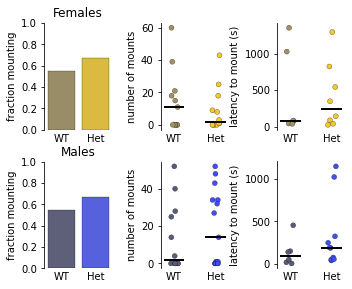

In [258]:
# --- All plots in subplots ---

# set parameters
sz=5 # dot size for strip plots
alpha=1 # dot transparency for strip plots
medianwidth=0.5 # width on x axis of median bands
mw = medianwidth/2 # convert to halfwidth for plotting
lw = 2 # weight of median band lines
hue_order = ['WT','Het'] # how groups should be arranged on x axis
figp=os.path.join('figures','2024June') # where to save figures
csz = 0.25
ptc='k'
plw=0.25
zorder=5
nrows = 2
ncols = 3

saveplots = True # whether to write plot outputs to disk


# make figure and subplots
f, ax = plt.subplots(nrows,ncols,figsize=(5, 4))
f.tight_layout()

# FRACTION MOUNTING

nrmountingF = ldf[ldf.sex=='F'].groupby('genotype', as_index=False).count()
nrmountingF['fraction']=ldf.latencies/nrmounting.number
nrmountingM = ldf[ldf.sex=='M'].groupby('genotype', as_index=False).count()
nrmountingM['fraction']=nrmounting.latencies/nrmounting.number

# stats
chisq = st.chisquare(nrmounting.fraction)
print(chisq)

# plot
sns.barplot(data=nrmountingF,x='genotype',y='fraction',ax=ax[0][0],palette=fpal,
            hue_order=hue_order,order=hue_order,edgecolor=ptc,linewidth=plw)
ax[0][0].set(xlabel="")
ax[0][0].set(ylabel='fraction mounting')
ax[0][0].set_ylim(top=1)
ax[0][0].set_title('Females')
sns.despine(fig=f, ax=ax[0][0], top=True, right=True, left=False, bottom=False, offset=None, trim=False)
ax[0][0].tick_params(axis='x',length=0)

sns.barplot(data=nrmountingM,x='genotype',y='fraction',ax=ax[1][0],palette=mpal,
            hue_order=hue_order,order=hue_order,edgecolor=ptc,linewidth=plw)
ax[1][0].set(xlabel="")
ax[1][0].set(ylabel='fraction mounting')
ax[1][0].set_ylim(top=1)
sns.despine(fig=f, ax=ax[1][0], top=True, right=True, left=False, bottom=False, offset=None, trim=False)
ax[1][0].tick_params(axis='x',length=0)
ax[1][0].set_title('Males')


# NUMBER OF MOUNTS

# stats
nroccstats_F = st.mannwhitneyu(ldf.number[np.logical_and(ldf.sex=='F',ldf.genotype=='WT')],ldf.number[np.logical_and(ldf.sex=='F',ldf.genotype=='Het')])
print(nroccstats_F)
nroccstats_M = st.mannwhitneyu(ldf.number[np.logical_and(ldf.sex=='M',ldf.genotype=='WT')],ldf.number[np.logical_and(ldf.sex=='M',ldf.genotype=='Het')])
print(nroccstats_M)

# plot
strip_plots_with_medians(ldf,'F','number','genotype',sz,alpha,ptc,plw,fpal,hue_order,mw,zorder,'number of mounts',ax[0][1],f)
strip_plots_with_medians(ldf,'M','number','genotype',sz,alpha,ptc,plw,mpal,hue_order,mw,zorder,'number of mounts',ax[1][1],f)


# LATENCY TO MOUNT

# stats
latencystats_F = st.mannwhitneyu(ldf.latencies[np.logical_and(ldf.sex=='F',ldf.genotype=='WT')].dropna(),ldf.latencies[np.logical_and(ldf.sex=='F',ldf.genotype=='Het')].dropna())
print(latencystats_F)
latencystats_M = st.mannwhitneyu(ldf.latencies[np.logical_and(ldf.sex=='M',ldf.genotype=='WT')].dropna(),ldf.latencies[np.logical_and(ldf.sex=='M',ldf.genotype=='Het')].dropna())
print(latencystats_M)

# plot

strip_plots_with_medians(ldf,'F','latencies','genotype',sz,alpha,ptc,plw,fpal,hue_order,mw,zorder,'latency to mount (s)',ax[0][2],f)
strip_plots_with_medians(ldf,'M','latencies','genotype',sz,alpha,ptc,plw,mpal,hue_order,mw,zorder,'latency to mount (s)',ax[1][2],f)

if saveplots:
    plt.savefig(os.path.join(figp,'timedMating_latency-to-mount_all-data_v2.pdf'))

In [242]:
ldf_median

genotype
Het    187.8095
WT      93.5835
Name: latencies, dtype: float64

Power_divergenceResult(statistic=0.03657595058868944, pvalue=0.9981598560318765)


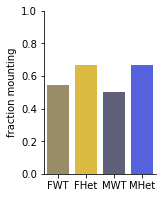

In [174]:
# --- Plot fraction of animals mounting ---
nrmounting = ldf.groupby("joint_category", as_index=False).count()
nrmounting['fraction']=nrmounting.latencies/nrmounting.number

chisq = st.chisquare(nrmounting.fraction)
print(chisq)

f, ax = plt.subplots(figsize=(2, 3))
sns.barplot(data=nrmounting,x='joint_category',y='fraction',hue_order=hue_order,order=hue_order)
ax.set(xlabel="")
ax.set(ylabel='fraction mounting')
ax.set_ylim(top=1)
sns.despine(fig=f, ax=ax, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

MannwhitneyuResult(statistic=70.5, pvalue=0.7995297551391234)
MannwhitneyuResult(statistic=73.0, pvalue=0.40420206100533085)


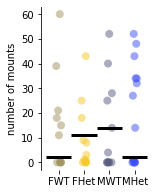

In [173]:
# --- Plot number of mount occurrences ---
sz=8
alpha=0.5
medianwidth=1
mw = medianwidth/2
lw = 3
hue_order = ['FWT','FHet','MWT','MHet']
cols = [col1,col2,col3,col4]
sns.set_palette(sns.color_palette(cols))

# stats
nroccstats_F = st.mannwhitneyu(ldf.number[np.logical_and(ldf.sex=='F',ldf.genotype=='WT')],ldf.number[np.logical_and(ldf.sex=='F',ldf.genotype=='Het')])
print(nroccstats_F)
nroccstats_M = st.mannwhitneyu(ldf.number[np.logical_and(ldf.sex=='M',ldf.genotype=='WT')],ldf.number[np.logical_and(ldf.sex=='M',ldf.genotype=='Het')])
print(nroccstats_M)

f, ax = plt.subplots(figsize=(2, 3))
sns.stripplot(data=ldf, x="joint_category", y="number", hue="joint_category",hue_order=hue_order,order=hue_order,s=sz,
              alpha=alpha,
              legend=False)
ldf_median = ldf.groupby('joint_category', sort=False)['number'].median()
_ = [ax.hlines(y, i-mw, i+mw, zorder=len(np.unique(ldf.joint_category))+1,colors=[0,0,0],linewidths=lw) for i, y in ldf_median.reset_index()['number'].items()]
ax.set(xlabel="")
ax.set(ylabel='number of mounts')
sns.despine(fig=f, ax=ax, top=True, right=True, left=False, bottom=True, offset=None, trim=False)

MannwhitneyuResult(statistic=22.0, pvalue=0.8518148518148518)
MannwhitneyuResult(statistic=18.0, pvalue=0.2197802197802198)


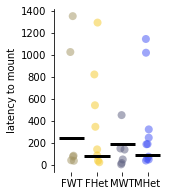

In [175]:
# --- Plot latencies to mount ---
f, ax = plt.subplots(figsize=(2, 3))

# stats
latencystats_F = st.mannwhitneyu(ldf.latencies[np.logical_and(ldf.sex=='F',ldf.genotype=='WT')].dropna(),ldf.latencies[np.logical_and(ldf.sex=='F',ldf.genotype=='Het')].dropna())
print(latencystats_F)
latencystats_M = st.mannwhitneyu(ldf.latencies[np.logical_and(ldf.sex=='M',ldf.genotype=='WT')].dropna(),ldf.latencies[np.logical_and(ldf.sex=='M',ldf.genotype=='Het')].dropna())
print(latencystats_M)

sns.stripplot(data=ldf, x="joint_category", y="latencies", hue="joint_category",s=sz, hue_order=hue_order,alpha=alpha,
              order=hue_order,legend=False)
ldf_median = ldf.groupby('joint_category', sort=False)['latencies'].median()
_ = [ax.hlines(y, i-mw, i+mw, zorder=len(np.unique(ldf.joint_category))+1,colors=[0,0,0],linewidths=lw) for i, y in ldf_median.reset_index()['latencies'].items()]
ax.set(xlabel="")
ax.set(xlabel="")
ax.set(ylabel='latency to mount')
sns.despine(fig=f, ax=ax, top=True, right=True, left=False, bottom=True, offset=None, trim=False)

In [170]:
ldf.latencies[np.logical_and(ldf.sex=='F',ldf.genotype=='WT')].dropna()

17      74.998
42    1353.631
43    1026.907
44      82.748
45      41.256
49      36.434
Name: latencies, dtype: float64

In [45]:
fname = 'Nov22_Pair15_timedMating.nwb'

# open file
io = NWBHDF5IO(os.path.join(nwbpath,fname), mode="r") # <-- open in write to append snippets?
nwbfile = io.read()

# for sanity check, print out the name of the file being handled
pathsplit = fname.split('\\')
recstem = pathsplit[-1].strip('.nwb')
print(recstem)

# filter out files that don't have complete timelines

# keep track of metadata
allSex.append(nwbfile.subject.sex)
allGT.append(nwbfile.subject.genotype)
colors.append(nwbfile.lab_meta_data['vole_metadata'].colors[:])

# -- Get time of first mount --

# load up the BORIS table from the NWB file
statsdf = nwbfile.intervals[usefield].to_dataframe()
    
#     # find start time of assay
#     assayStart = float(statsdf.start_time[statsdf.behavior=='Start assay'])
#     # find time of first scored mount
#     firstMount = np.min(statsdf.start_time[statsdf.behavior=='Mount'])
#     # subtract start time to get assay-aligned time
#     firstMountAligned = firstMount-assayStart
#     # append to times array
#     times.append(firstMountAligned)

Nov22_Pair15_timedMating


In [46]:
statsdf

,start_time,stop_time,behavior,duration,atype
id,,,,,
0,33.143,33.143,Start assay,NaN,POINT
1,33.144,51.392,No interaction,18.248,STATE
2,51.393,52.141,Investigate,0.748,STATE
3,52.142,52.891,No interaction,0.749,STATE
4,52.892,54.141,Sniff,1.249,STATE
...,...,...,...,...,...
398,1812.387,1813.889,No interaction,1.502,STATE
399,1813.890,1816.387,Huddle,2.497,STATE
400,1816.388,1827.890,No interaction,11.503,STATE


In [47]:
ismount = statsdf.behavior=='Mount'
mstarts = statsdf.start_time[ismount]

In [48]:
ismount.value_counts()
ismount.values.sum()

0